In [1]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt

In [2]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()


In [3]:
color=['#ADA1F0','#A1F0CB','#F0ACA1','#F0E284','#9E7D78','#5980F0','#59F067','#EF598B','#F0BD3C','#9E7583']
sns.set_palette(sns.color_palette(color))

In [4]:
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
welfare = welfare.rename(
    columns= {'h14_g3' :'sex',
              'h14_g4' :'birth',
              'h14_g10' :'marriage_type',
              'h14_g11' :'religion',
              'p1402_8aq1' :'income',
              'h14_eco9' :'code_job',
              'h14_reg7' :'code_region'}
)
welfare['marriage_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: marriage_type
Non-Null Count  Dtype  
--------------  -----  
14418 non-null  float64
dtypes: float64(1)
memory usage: 112.8 KB


In [7]:
plt.rcParams.update({'font.family':'Malgun Gothic'})

In [6]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [8]:
list_region = pd.DataFrame({'code_region' : [1,2,3,4,5,6,7],
                            'region'      :['서울',
                                            '수도권(인천/경기)',
                                            '부산/경남/울산',
                                            '대구/경북',
                                            '대전/충남',
                                            '강원/충북',
                                            '광주/전남/전북/제주도',]})
welfare = welfare.merge(list_region, how= 'left',on='code_region')
welfare[['code_region','region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [10]:
welfare=welfare.assign(age = 2019-welfare['birth']+1)


In [11]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30,'young',
                                np.where(welfare['age']<=59,'middle','old')))

welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

In [13]:
region_age=welfare.groupby('region',as_index=False)\
                  ['ageg']\
                  .value_counts(normalize=True)
region_age= region_age.assign(proportion = region_age['proportion']*100).round(1)

<Axes: xlabel='proportion', ylabel='region'>

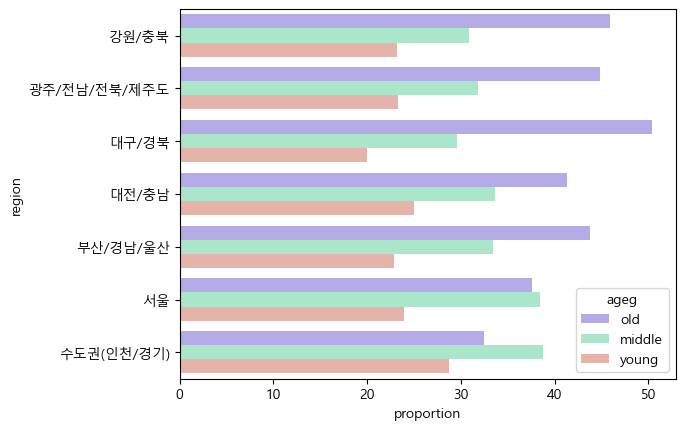

In [14]:
sns.barplot(data=region_age,y='region',x='proportion',hue='ageg')

In [15]:
pivot_df = region_age[['region','ageg','proportion']].pivot(index = 'region', columns = 'ageg', values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


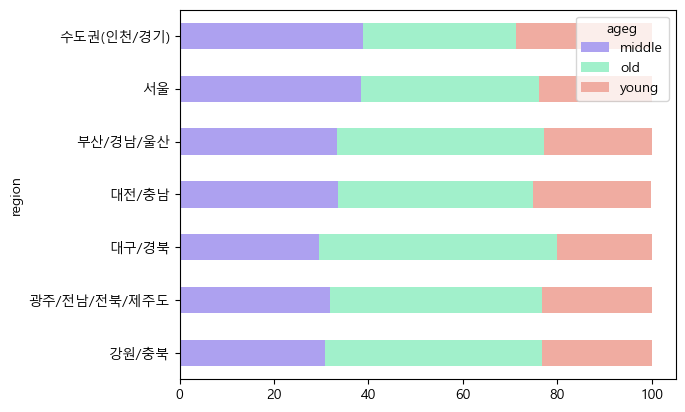

In [17]:
pivot_df.plot.barh(stacked = True);

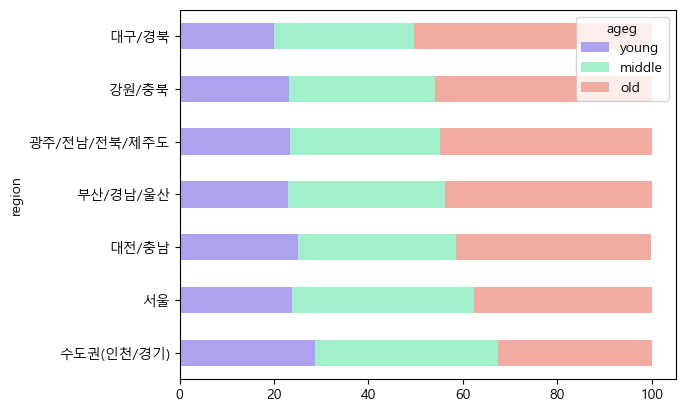

In [19]:
reorder_df = pivot_df.sort_values('old')[['young','middle','old']]
reorder_df.plot.barh(stacked=True);